In [ ]:

%load_ext autoreload
%autoreload 2

In [ ]:
# default_exp core

# module name here

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from fastai2.vision.all import *
from fastai2.tabular.all import *
from fastai2.data.load import _FakeLoader, _loaders

In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)







In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            try: # In case the data is unlabelled
                batch.append(b[1][1]) # y
                yield tuple(batch)
            except:
                yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

In [ ]:
files = get_image_files("/home/mrdbarros/projetos/data/csgo_analyze/processed/de_mirage")
len(files)

11860

In [ ]:
def fileLabeller(o,**kwargs):
    winnerFile = Path(o).parent/"winner.txt"
    f = open(winnerFile, "r")
    winner = f.readline()
    f.close()
    return winner

print(files[0])
print(fileLabeller(files[0]))

/home/mrdbarros/projetos/data/csgo_analyze/processed/de_mirage/6/ct_2_t_3/output_map16.jpg
ct


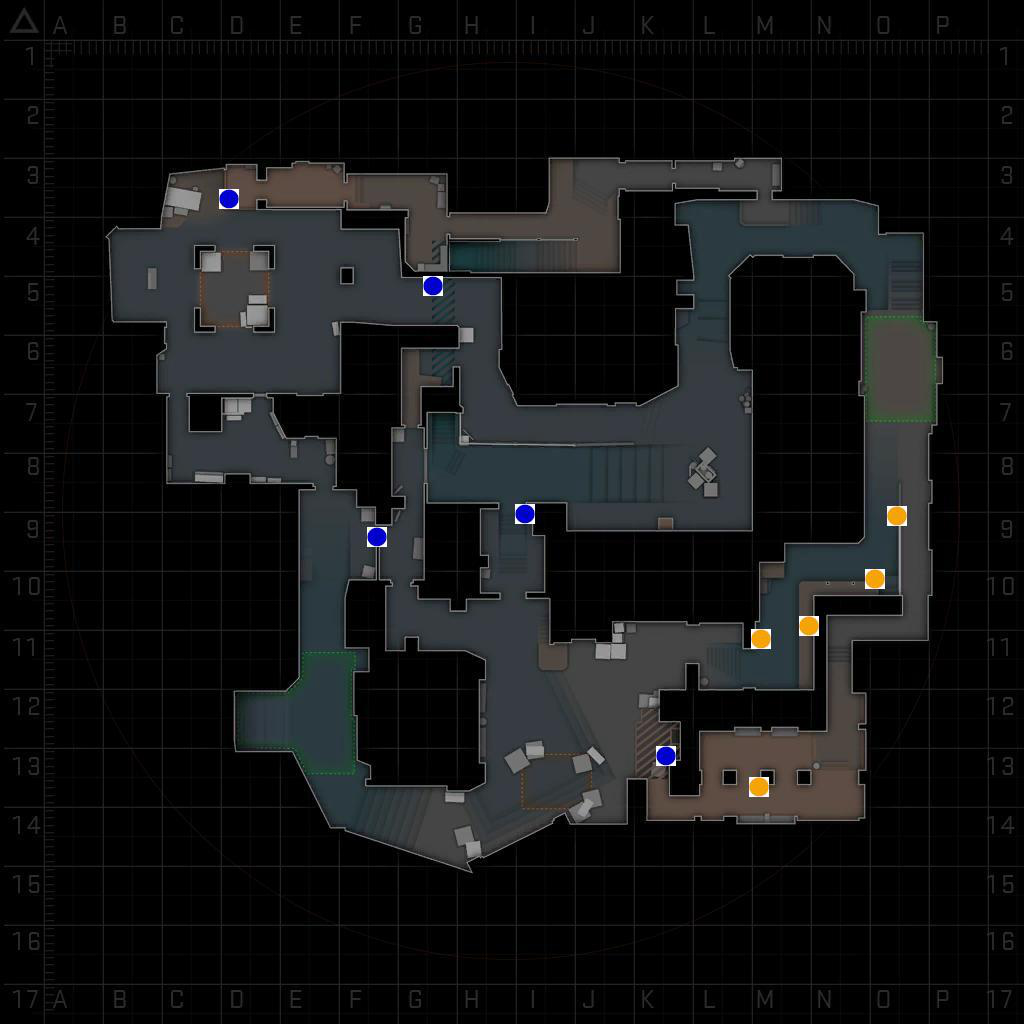

In [ ]:
PILImage.create(files[0])

In [ ]:
from fastai2.data.load import _FakeLoader, _loaders
class MixedDL():
    def __init__(self, tab_dl:TabDataLoader, vis_dl:TfmdDL, device='cuda:0'):
        "Stores away `tab_dl` and `vis_dl`, and overrides `shuffle_fn`"
        self.device = device
        tab_dl.shuffle_fn = self.shuffle_fn
        vis_dl.shuffle_fn = self.shuffle_fn
        self.dls = [tab_dl, vis_dl]
        self.count = 0
        self.fake_l = _FakeLoader(self, False, 0, 0)







In [ ]:
@patch
def shuffle_fn(x:MixedDL, idxs):
        "Generates a new `rng` based upon which `DataLoader` is called"
        if x.count == 0: # if we haven't generated an rng yet
            x.rng = x.dls[0].rng.sample(idxs, len(idxs))
            x.count += 1
            return x.rng
        else:
            x.count = 0
            return x.rng

@patch
def __iter__(dl:MixedDL):
        "Iterate over your `DataLoader`"
        z = zip(*[_loaders[i.fake_l.num_workers==0](i.fake_l) for i in dl.dls])
        for b in z:
            if dl.device is not None:
                b = to_device(b, dl.device)
            batch = []
            batch.extend(dl.dls[0].after_batch(b[0])[:2]) # tabular cat and cont
            batch.append(dl.dls[1].after_batch(b[1][0])) # Image
            try: # In case the data is unlabelled
                batch.append(b[1][1]) # y
                yield tuple(batch)
            except:
                yield tuple(batch)

@patch
def one_batch(x:MixedDL):
        "Grab a batch from the `DataLoader`"
        with x.fake_l.no_multiproc(): res = first(x)
        if hasattr(x, 'it'): delattr(x, 'it')
        return res

@patch
def __len__(x:MixedDL): return len(x.dls[0])

@patch
def to(x:MixedDL, device): x.device = device

In [ ]:
files = get_image_files("/home/marcel/projetos/data/csgo_analyze/processed/de_mirage")
len(files)

11860